<font size="5">PURPOSE OF PROJECT: CREATE A REGRESSION MODEL TO PREDICT MONTHLY INCOME </font>

<font size="4"> My project is split into 3 parts. Each notebook focuses on a specific portion of the machine learning workflow. This notebook is part 2 out of 3 of my Regression Model Project. </font>

<font size="4"> The focus in this notebook are exploratory data analysis and feature selection. See part 1 and part 3 for notebooks on data cleaning and model performance testing. </font>

METHODS FOR CHOOSING FEATURES:

    CHOOSING FEATURES FOR NUMERIC VARIABLES:
    1. Spearman's and Pearson's correlation coefficient of features vs. target labels
    2. Visual inspection of scatter plots to detect patterns when plotting  features vs. target labels.
    
    CHOOSING FEATURES FOR CATEGORICAL VARIABLES:
    1. Features were chosen based on whether grouping by different categories in a column will yield different
       distributions for the target variable.
       
       NOTE: Choosing categorical is explained more in the cells below.

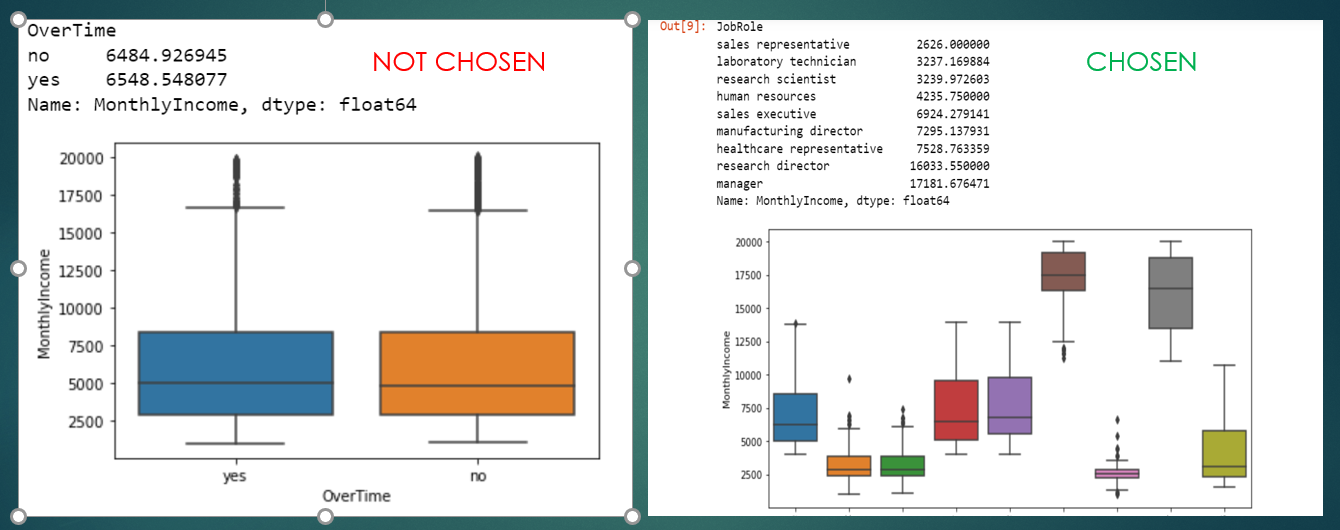

<b> To explain how categorical features were chosen, there are 2 categorical features above. On the left is OverTime, and on the right is JobRole </b>

OverTime was NOT CHOSEN as an input feature because it says very little about the target variable (monthly income). This is because monthly income distributions are the same when grouped by "yes" and "no". Furthermore, the average monthly income between those who do overtime and those who don't are very similar. As a result of these two facts, the OverTime feature says very little about the target variable and should not be included in the model.

On the contrary, "JobRole" is a feature that was CHOSEN. If we group monthly income by each job role, we can see that the distributions are radically different. Furthermore, the average income between each job role varies along with each role. As a result, the model can learn meaningful patterns for estimating monthly income; this is why this feature was selected as an input feature to the model.

Below is a set of features that were chosen for our model.  

CHOSEN FEATURES:

    NUMERIC FEATURES:
    1. JobLevel
    2. TotalWorkingYears 
    3. YearsAtCompany
    4. YearsSinceLastPromotion
    5. YearsWithCurrManager
    6. YearsInCurrentRole 
    7. Age

    CATEGORICAL FEATURES:
    1. Attrition 
    2. JobRole
    3. Educational Field



In [20]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [21]:
'''
Read the CSV.

NOTE: The dataset was cleaned in Part 1 Notebook.
'''

df = pd.read_csv('ibm_attrition_group_version_1.csv')

In [22]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,yes,travel_rarely,1102,sales,1,2,life sciences,1,...,3,1,0,8,0,1,6,4,0,5
1,1,49,no,travel_frequently,279,research & development,8,1,life sciences,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,yes,travel_rarely,1373,research & development,2,2,other,4,...,3,2,0,7,3,3,0,0,0,0
3,3,33,no,travel_frequently,1392,research & development,3,4,life sciences,5,...,3,3,0,8,3,3,8,7,3,0
4,4,27,no,travel_rarely,591,research & development,2,1,medical,7,...,3,4,1,6,3,3,2,2,2,2


# ANALYSIS OF NUMERICAL VARAIBLES VS. INCOME

<b> The purpose of this section is for determining which numerical features should be used in the model. </b>

In [23]:
"""
Get all numeric columns.
"""

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

number_only = df.select_dtypes(include=numerics)
number_only

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1102,1,2,1,2,94,3,2,...,3,1,0,8,0,1,6,4,0,5
1,1,49,279,8,1,2,3,61,2,2,...,4,4,1,10,3,3,10,7,1,7
2,2,37,1373,2,2,4,4,92,2,1,...,3,2,0,7,3,3,0,0,0,0
3,3,33,1392,3,4,5,4,56,3,1,...,3,3,0,8,3,3,8,7,3,0
4,4,27,591,2,1,7,1,40,3,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,884,23,2,2061,3,41,4,2,...,3,3,1,17,3,3,5,2,0,3
1466,1466,39,613,6,1,2062,4,42,2,3,...,3,1,1,9,5,3,7,7,1,7
1467,1467,27,155,4,3,2064,2,87,4,2,...,4,2,1,6,0,3,6,2,0,3
1468,1468,49,1023,2,3,2065,4,63,2,2,...,3,4,0,17,3,2,9,6,0,8


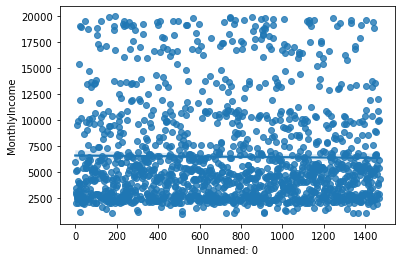

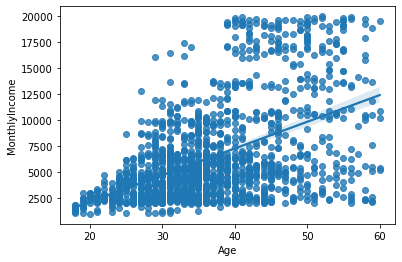

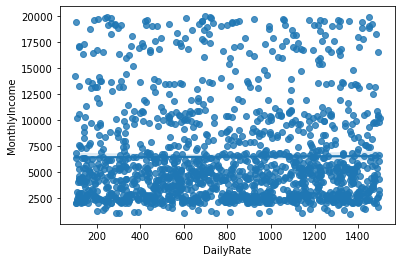

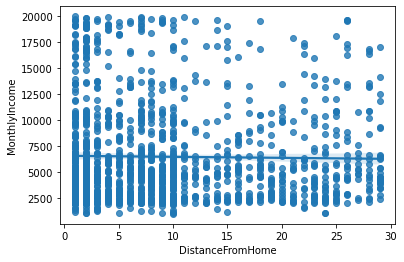

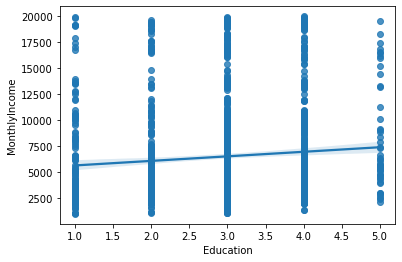

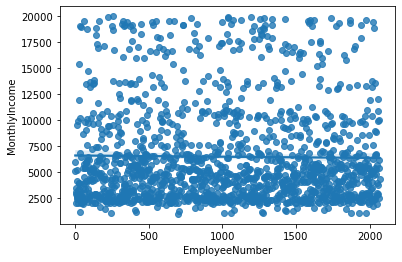

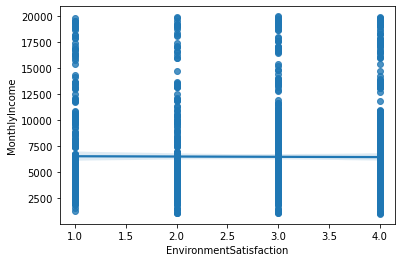

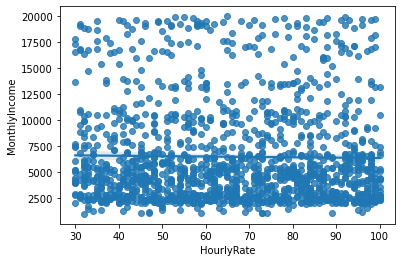

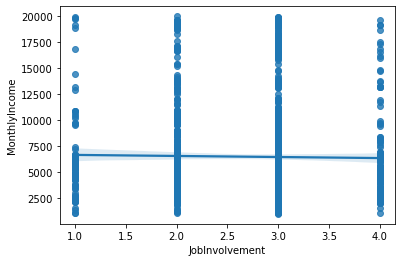

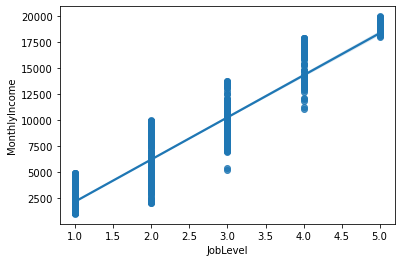

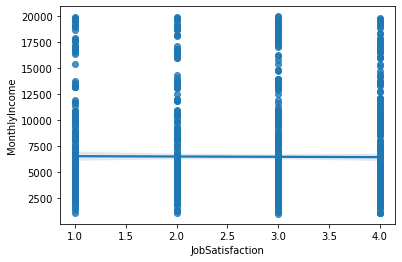

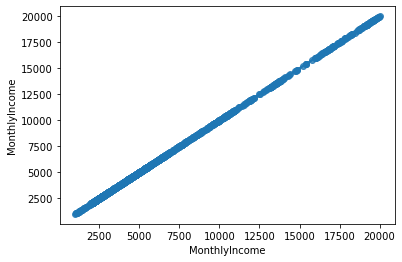

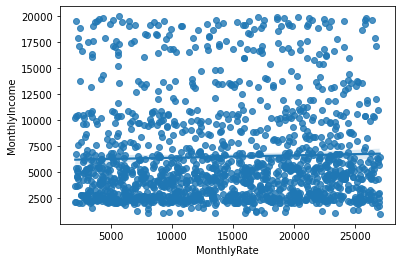

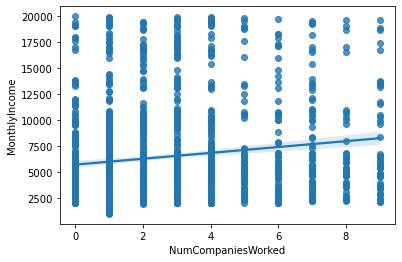

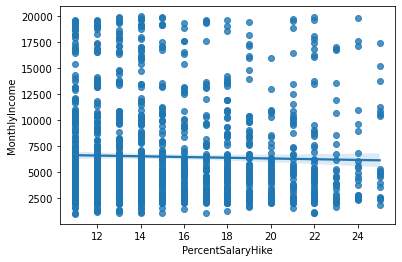

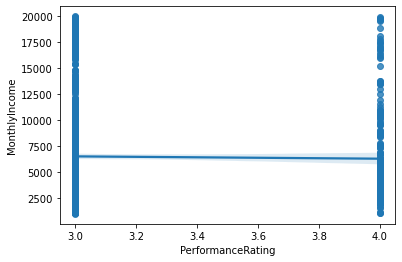

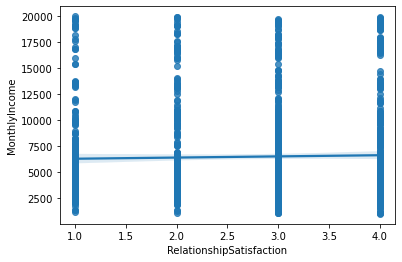

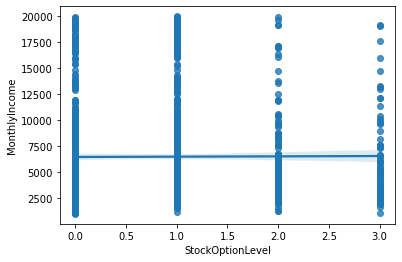

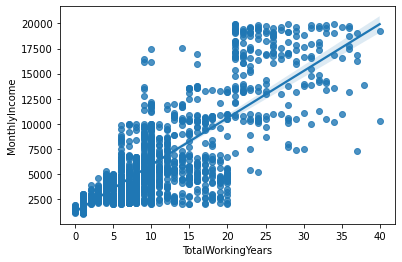

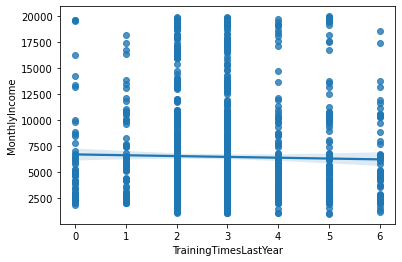

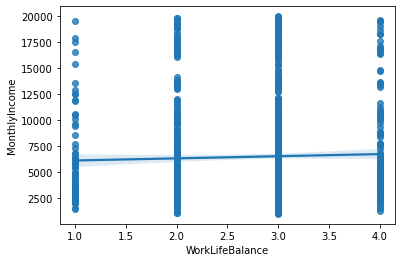

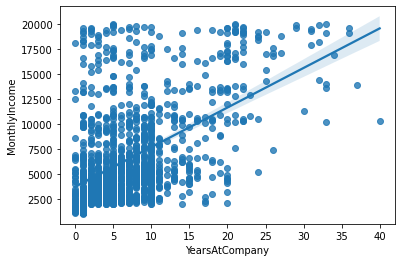

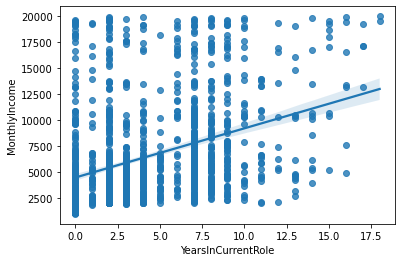

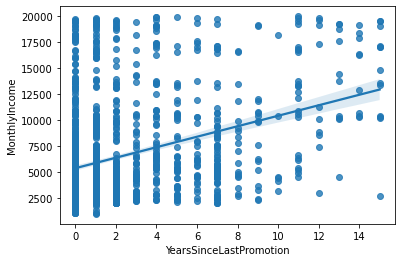

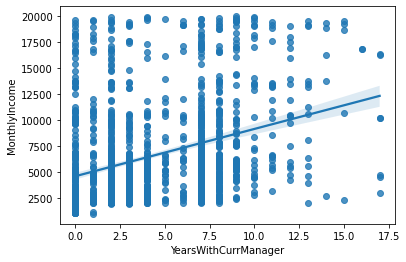

In [24]:
'''
Plot monthly income (target label) vs. all other numeric columns to visually inspect for patterns.
'''

for col in number_only.columns:
    sns.regplot(x=number_only[col],y=number_only['MonthlyIncome'])
    plt.show()

<AxesSubplot:xlabel='JobLevel', ylabel='MonthlyIncome'>

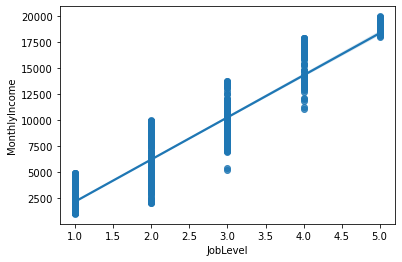

In [25]:
'''
JobLevel vs. MonthlyIncome

Visualize highly correlated variables when compared to Monthly Income.
'''

sns.regplot(data=df, x='JobLevel', y='MonthlyIncome')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

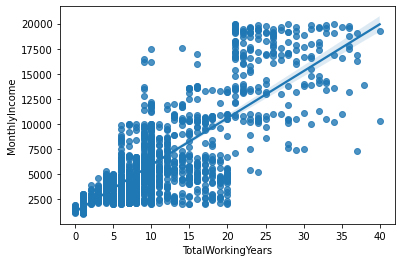

In [26]:
'''
TotalWorkingYears vs. MonthlyIncome

Visualize highly correlated variables when compared to Monthly Income.
'''
sns.regplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')

In [27]:
'''
Pearson's Correlation coefficient for with other numerical variables vs. Monthly Income 
'''

df.corr().abs()['MonthlyIncome'].sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.950300
TotalWorkingYears           0.772893
YearsAtCompany              0.514285
Age                         0.497855
YearsInCurrentRole          0.363818
YearsSinceLastPromotion     0.344978
YearsWithCurrManager        0.344079
NumCompaniesWorked          0.149515
Education                   0.094961
MonthlyRate                 0.034814
WorkLifeBalance             0.030683
PercentSalaryHike           0.027269
RelationshipSatisfaction    0.025873
TrainingTimesLastYear       0.021736
PerformanceRating           0.017120
DistanceFromHome            0.017014
HourlyRate                  0.015794
JobInvolvement              0.015271
EmployeeNumber              0.014829
Unnamed: 0                  0.014377
DailyRate                   0.007707
JobSatisfaction             0.007157
EnvironmentSatisfaction     0.006259
StockOptionLevel            0.005408
Name: MonthlyIncome, dtype: float64

<AxesSubplot:>

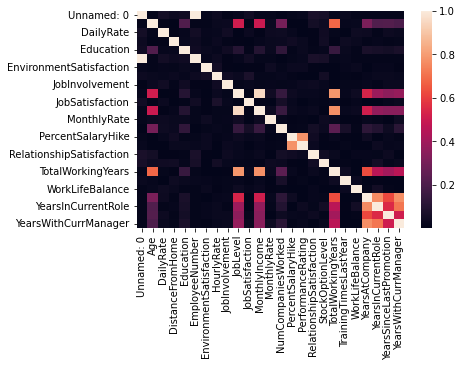

In [28]:
'''
Heatmap of pearson's correlation correlation matrix for the dataset.
'''

sns.heatmap(df.corr().abs())

In [29]:
'''
Spearman's Correlation coefficient for with other numerical variables vs. Monthly Income 
'''

df.corr(method='spearman').abs()['MonthlyIncome'].sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.920429
TotalWorkingYears           0.710024
Age                         0.471902
YearsAtCompany              0.464315
YearsInCurrentRole          0.394712
YearsWithCurrManager        0.365386
YearsSinceLastPromotion     0.264599
NumCompaniesWorked          0.190307
Education                   0.120028
MonthlyRate                 0.054277
StockOptionLevel            0.045852
TrainingTimesLastYear       0.034847
PercentSalaryHike           0.033767
WorkLifeBalance             0.030759
PerformanceRating           0.026999
JobInvolvement              0.024552
HourlyRate                  0.019762
DailyRate                   0.016260
EnvironmentSatisfaction     0.015163
JobSatisfaction             0.004881
RelationshipSatisfaction    0.003885
DistanceFromHome            0.002512
EmployeeNumber              0.001797
Unnamed: 0                  0.001797
Name: MonthlyIncome, dtype: float64

# ANALYSIS OF CATEGORICAL VARIABLES VS. MONTHLY INCOME

<b> This section aims to determine which categorical features should be used in the model. </b>

Attrition
no     6832.739659
yes    4787.092827
Name: MonthlyIncome, dtype: float64

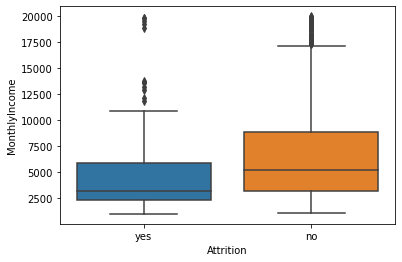

In [30]:
'''
Attrition vs. Income

Attrition was selected as an input feature.

Monthly income is distributed differently when grouped by Attrition.
'''
sns.boxplot(x='Attrition',y='MonthlyIncome',data=df)
df.groupby('Attrition')['MonthlyIncome'].mean()

EducationField
technical degree    5758.303030
other               6071.548780
life sciences       6463.288779
medical             6510.036638
human resources     7241.148148
marketing           7348.584906
Name: MonthlyIncome, dtype: float64

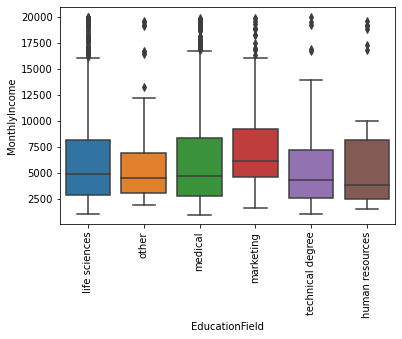

In [31]:
'''
Educational Field vs. Monthly Income

Educational Field was selected as an input feature.

Monthly income is distributed differently when grouped by Educational Field.
'''

sns.boxplot(x='EducationField', y='MonthlyIncome',data=df)
plt.xticks(rotation=90)
df.groupby('EducationField')['MonthlyIncome'].mean().sort_values()

JobRole
sales representative          2626.000000
laboratory technician         3237.169884
research scientist            3239.972603
human resources               4235.750000
sales executive               6924.279141
manufacturing director        7295.137931
healthcare representative     7528.763359
research director            16033.550000
manager                      17181.676471
Name: MonthlyIncome, dtype: float64

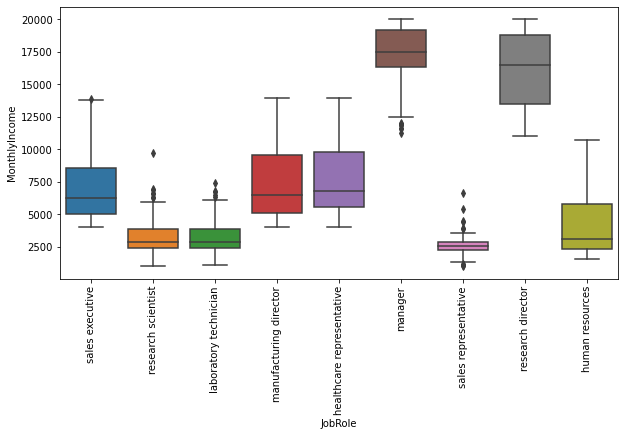

In [32]:
'''
Job Role vs. Monthly Income 

JobRole was selected as an input feature.

Monthly income is distributed differently when grouped by job role.
'''

plt.figure(figsize=(10, 5))
plot_job_role = sns.boxplot(x='JobRole', y='MonthlyIncome',data=df)
plt.xticks(rotation=90)
df.groupby('JobRole')['MonthlyIncome'].mean().sort_values()

BusinessTravel
non-travel           6261.946667
travel_frequently    6193.725632
travel_rarely        6619.707574
Name: MonthlyIncome, dtype: float64

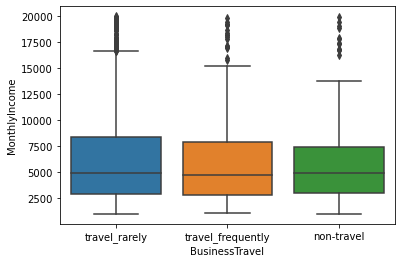

In [33]:
'''
Business Travel vs. Monthly Income
'''
sns.boxplot(x='BusinessTravel',y='MonthlyIncome',data=df)
df.groupby('BusinessTravel')['MonthlyIncome'].mean()

Department
human resources           6654.507937
research & development    6281.252862
sales                     6959.172646
Name: MonthlyIncome, dtype: float64

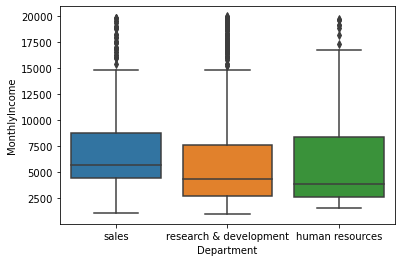

In [34]:
'''
Department vs. Monthly Income
'''
sns.boxplot(x='Department',y='MonthlyIncome',data=df)
df.groupby('Department')['MonthlyIncome'].mean()

Gender
female    6686.566327
male      6380.507937
Name: MonthlyIncome, dtype: float64

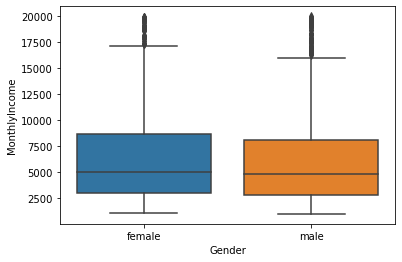

In [35]:
'''
Gender vs. Monthly Income
'''
sns.boxplot(x='Gender', y='MonthlyIncome',data=df)
df.groupby('Gender')['MonthlyIncome'].mean()

MaritalStatus
single      5889.472340
divorced    6786.287462
married     6793.671620
Name: MonthlyIncome, dtype: float64

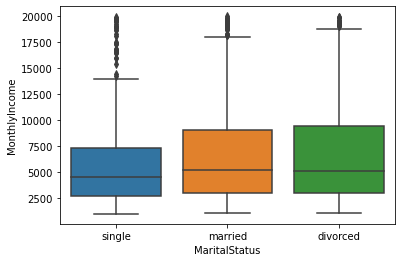

In [36]:
'''
Marital Status vs. Monthly Income
'''
sns.boxplot(x='MaritalStatus', y='MonthlyIncome',data=df)
df.groupby('MaritalStatus')['MonthlyIncome'].mean().sort_values()

OverTime
no     6484.926945
yes    6548.548077
Name: MonthlyIncome, dtype: float64

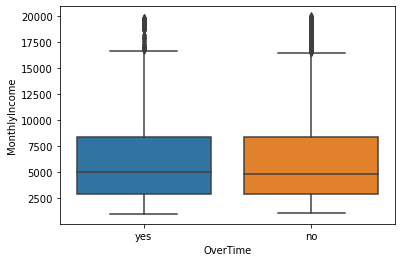

In [37]:
'''
OverTime vs. Monthly Income
'''
sns.boxplot(x='OverTime', y='MonthlyIncome',data=df)
df.groupby('OverTime')['MonthlyIncome'].mean().sort_values()